## This is demo for the assessment of one station's performance over the yearly available data

In [51]:
# Import required libraries for station_view function
import pandas as pd
import numpy as np
import os
import glob
from datetime import datetime, timedelta
import sys
import matplotlib.pyplot as plt

# Ensure project root is in Python path
project_root = os.path.dirname(os.getcwd())  # Go up from demos to RDM_analysis
if project_root not in sys.path:
    sys.path.insert(0, project_root)

# Force reload of the module to get updated function signatures
import importlib
if 'outputs.utils' in sys.modules:
    import outputs.utils
    importlib.reload(outputs.utils)
    print("✅ Reloaded outputs.utils module")

if 'outputs.load_data' in sys.modules:
    import outputs.load_data
    importlib.reload(outputs.load_data)
    print("✅ Reloaded outputs.load_data module")

try:
    from outputs.load_data import load_processed_data
    from outputs.utils import station_view_yearly, plot_variable_relationships_normalized, plot_trains_in_system_vs_delay
    print("✅ Libraries imported successfully for station_view analysis")
    print("✅ New normalized function imported: plot_variable_relationships_normalized")
    print("✅ New trains in system vs delay function imported: plot_trains_in_system_vs_delay")
except ImportError as e:
    print(f"❌ Import error: {e}")
    print("Make sure you're running from the RDM_analysis directory")
except Exception as e:
    print(f"❌ Error: {e}")

station_view_yearly function ready!
plot_arrival_hour_distributions_violin function ready!
plot_variable_relationships function ready!
plot_variable_relationships_normalized function ready!
plot_trains_in_system_vs_delay function ready!
✅ Reloaded outputs.utils module
✅ Reloaded outputs.load_data module
✅ Libraries imported successfully for station_view analysis
✅ New normalized function imported: plot_variable_relationships_normalized
✅ New trains in system vs delay function imported: plot_trains_in_system_vs_delay


Loading processed data

In [6]:
from outputs.load_data import load_processed_data

all_data = load_processed_data()

✅ Loaded 10,529,736 rows from 2606 files. Skipped 0.


In [52]:
# Test the updated yearly analysis function
incident_summary, normal_summary = station_view_yearly(
    station_id='33087', 
    interval_minutes=60
)

# Display the results
print(" YEARLY STATION ANALYSIS RESULTS:")
print("=" * 80)

if incident_summary is not None and len(incident_summary) > 0:
    print("\n🔴 INCIDENT OPERATIONS:")
    print("-" * 40)
    print(incident_summary.to_string(index=False))
    print(f"Total incident periods: {len(incident_summary)}")
    
if normal_summary is not None and len(normal_summary) > 0:
    print("\n🟢 NORMAL OPERATIONS:")
    print("-" * 40)
    print(normal_summary.to_string(index=False))
    print(f"Total normal periods: {len(normal_summary)}")

print("=" * 80)

Loaded 10373 records from MO.parquet
Loaded 9560 records from TU.parquet
Loaded 9498 records from WE.parquet
Loaded 9745 records from TH.parquet
Loaded 9183 records from FR.parquet
Loaded 7395 records from SA.parquet
Loaded 2744 records from SU.parquet
Total combined records: 58498
Incident-related records: 2440
Normal operations records: 3201
 YEARLY STATION ANALYSIS RESULTS:

🔴 INCIDENT OPERATIONS:
----------------------------------------
time_period  ontime_arrival_count  delayed_arrival_count  cancellation_count                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

Testing variable relationships function...
🚀 CREATING NORMALIZED TEMPORAL FLOW ANALYSIS FOR STATION 33087
📊 Normalizing by 11 platforms
Loaded 58498 total records for station 33087
Using 57734 arrived trains (both incident and non-incident) for flow calculation
Creating datetime timestamps from EVENT_DATETIME...
Loaded 58498 total records for station 33087
Using 57734 arrived trains (both incident and non-incident) for flow calculation
Creating datetime timestamps from EVENT_DATETIME...
Found date mappings for 7 day codes
  MO: 60 unique dates from 2024-02-05 to 2024-12-30
  TU: 56 unique dates from 2024-02-06 to 2024-12-31
  WE: 55 unique dates from 2024-02-07 to 2025-01-02
  TH: 58 unique dates from 2024-02-08 to 2025-01-03
  FR: 62 unique dates from 2024-02-09 to 2025-01-03
  SA: 58 unique dates from 2024-02-10 to 2025-01-04
  SU: 53 unique dates from 2024-02-04 to 2024-12-29
Found date mappings for 7 day codes
  MO: 60 unique dates from 2024-02-05 to 2024-12-30
  TU: 56 unique date

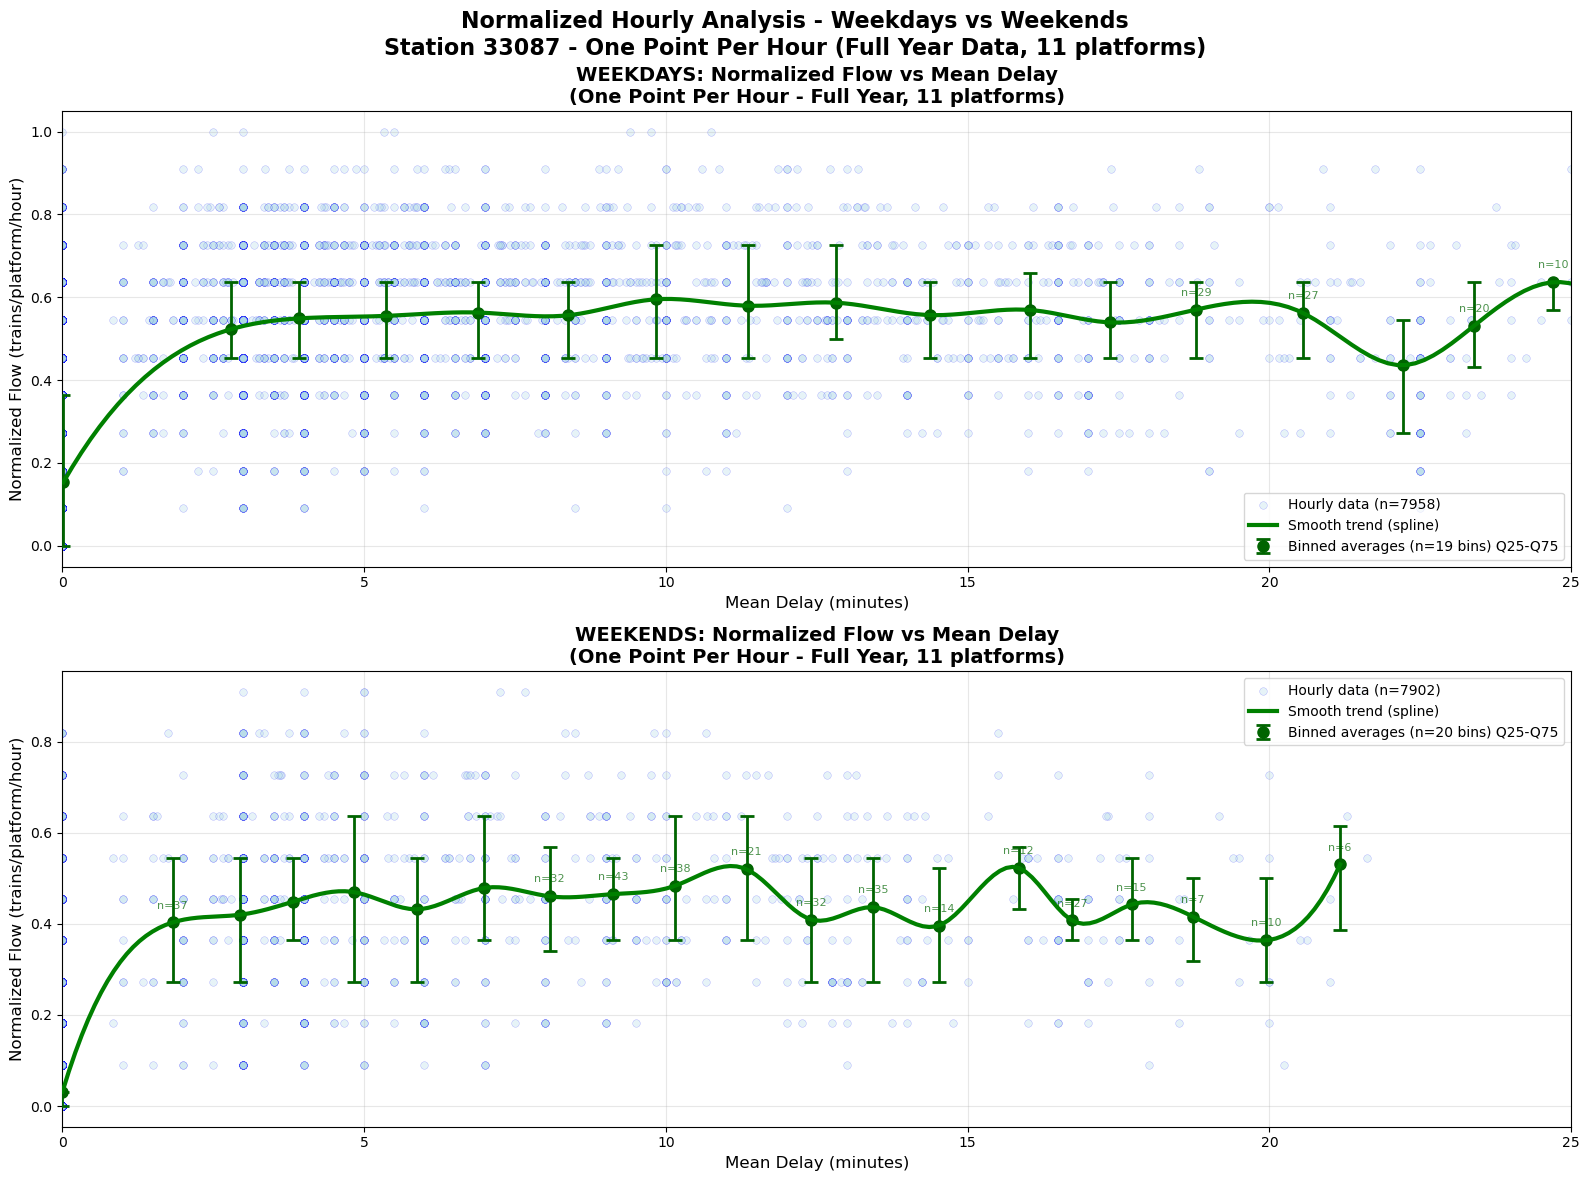

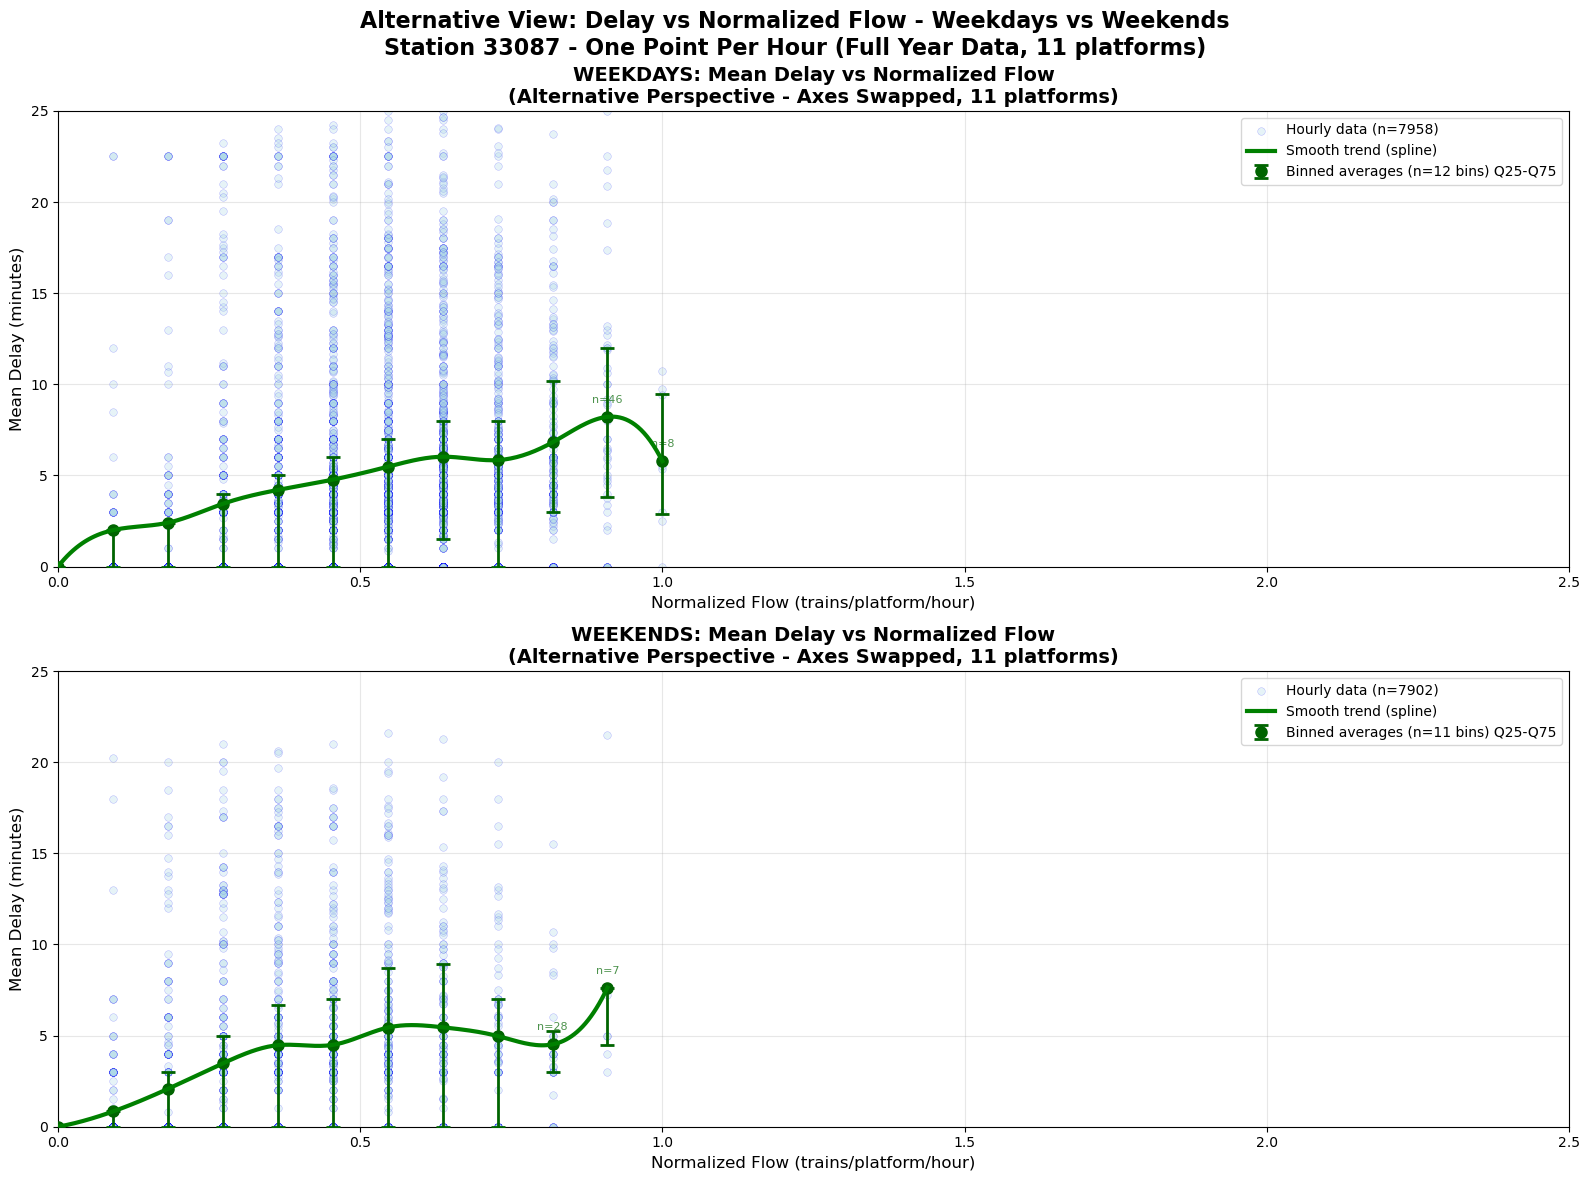

In [53]:
# Manchester Oxford Road Station Tests
# Test the variable relationships function
print("Testing variable relationships function...")
relationships_results = plot_variable_relationships_normalized(
    station_id='33087',
    all_data=all_data,
    time_window_minutes=60,
    num_platforms=11,
    figsize=(16, 12),
    max_delay_percentile=98
)
plt.show()

Testing variable relationships function...
🚀 CREATING NORMALIZED TEMPORAL FLOW ANALYSIS FOR STATION 32000
📊 Normalizing by 12 platforms
Loaded 217738 total records for station 32000
Using 214264 arrived trains (both incident and non-incident) for flow calculation
Creating datetime timestamps from EVENT_DATETIME...
Found date mappings for 7 day codes
  MO: 74 unique dates from 2024-02-05 to 2024-12-31
  TU: 72 unique dates from 2024-02-06 to 2025-01-01
  WE: 72 unique dates from 2024-02-07 to 2025-01-01
  TH: 73 unique dates from 2024-02-08 to 2025-01-03
  FR: 79 unique dates from 2024-02-09 to 2025-01-04
  SA: 66 unique dates from 2024-02-10 to 2025-01-04
  SU: 62 unique dates from 2024-02-04 to 2024-12-29
Found date mappings for 7 day codes
  MO: 74 unique dates from 2024-02-05 to 2024-12-31
  TU: 72 unique dates from 2024-02-06 to 2025-01-01
  WE: 72 unique dates from 2024-02-07 to 2025-01-01
  TH: 73 unique dates from 2024-02-08 to 2025-01-03
  FR: 79 unique dates from 2024-02-09 to

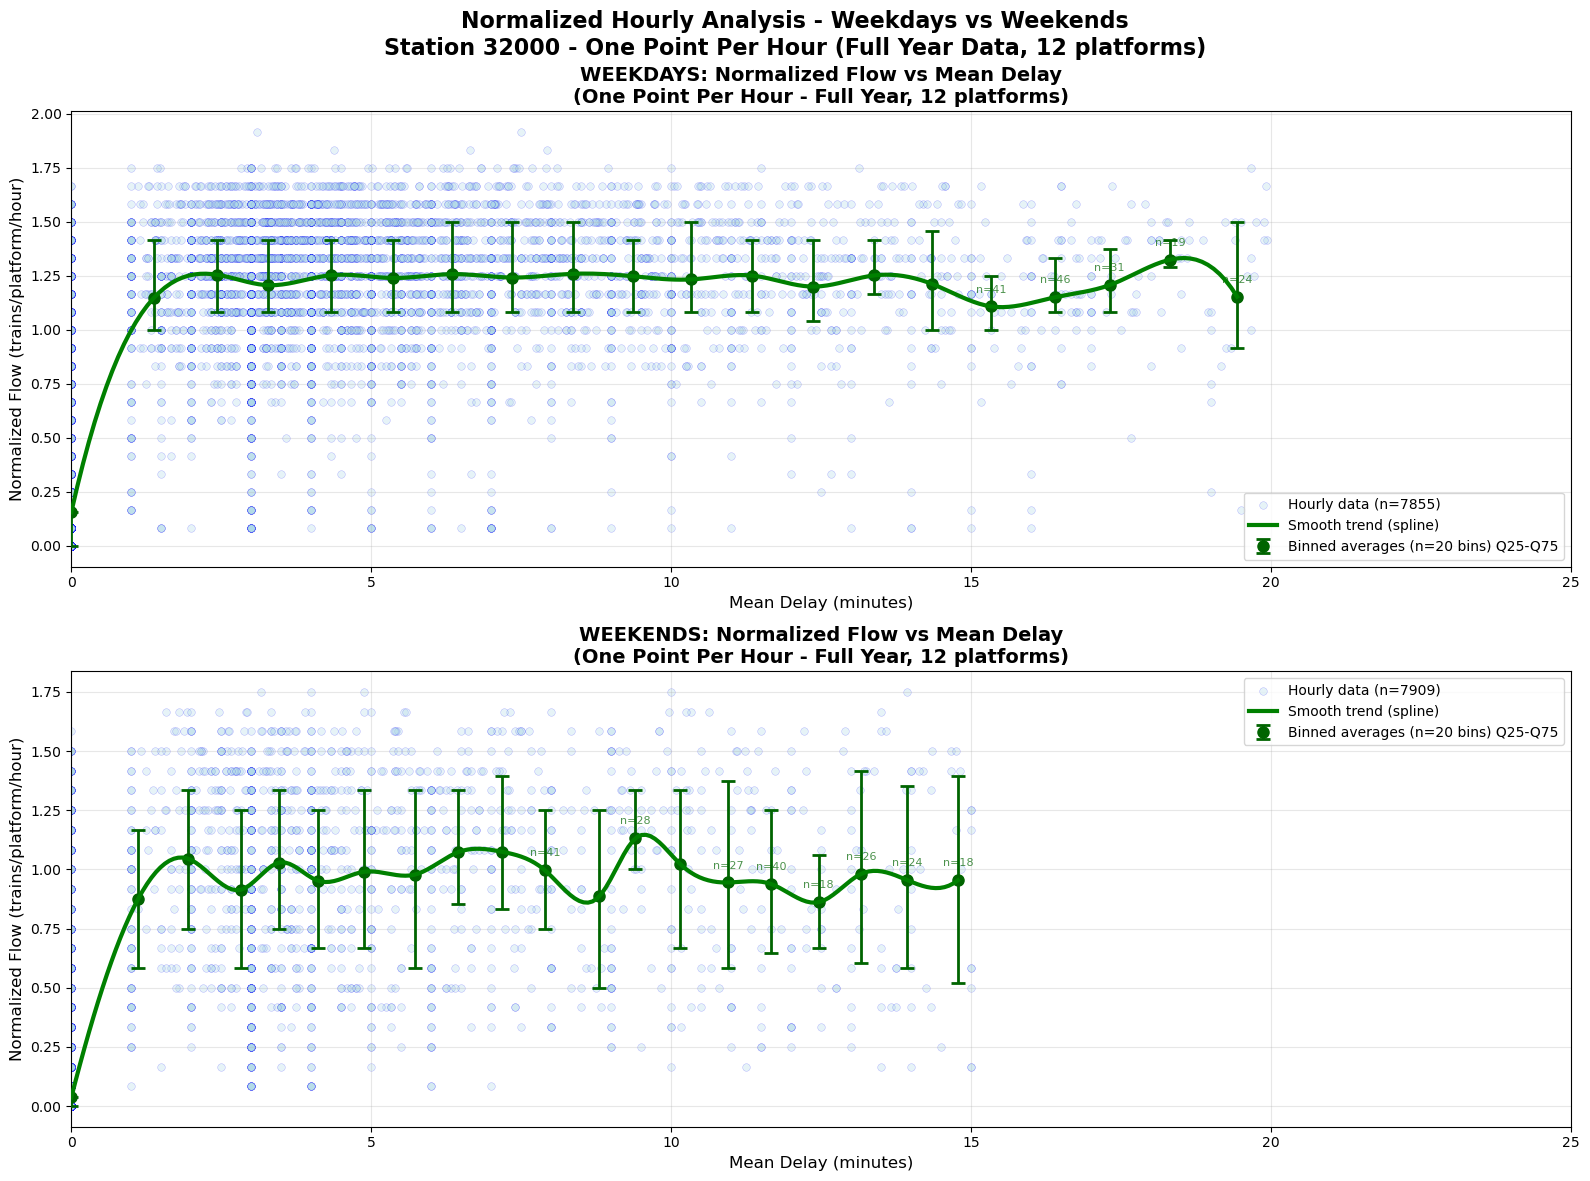

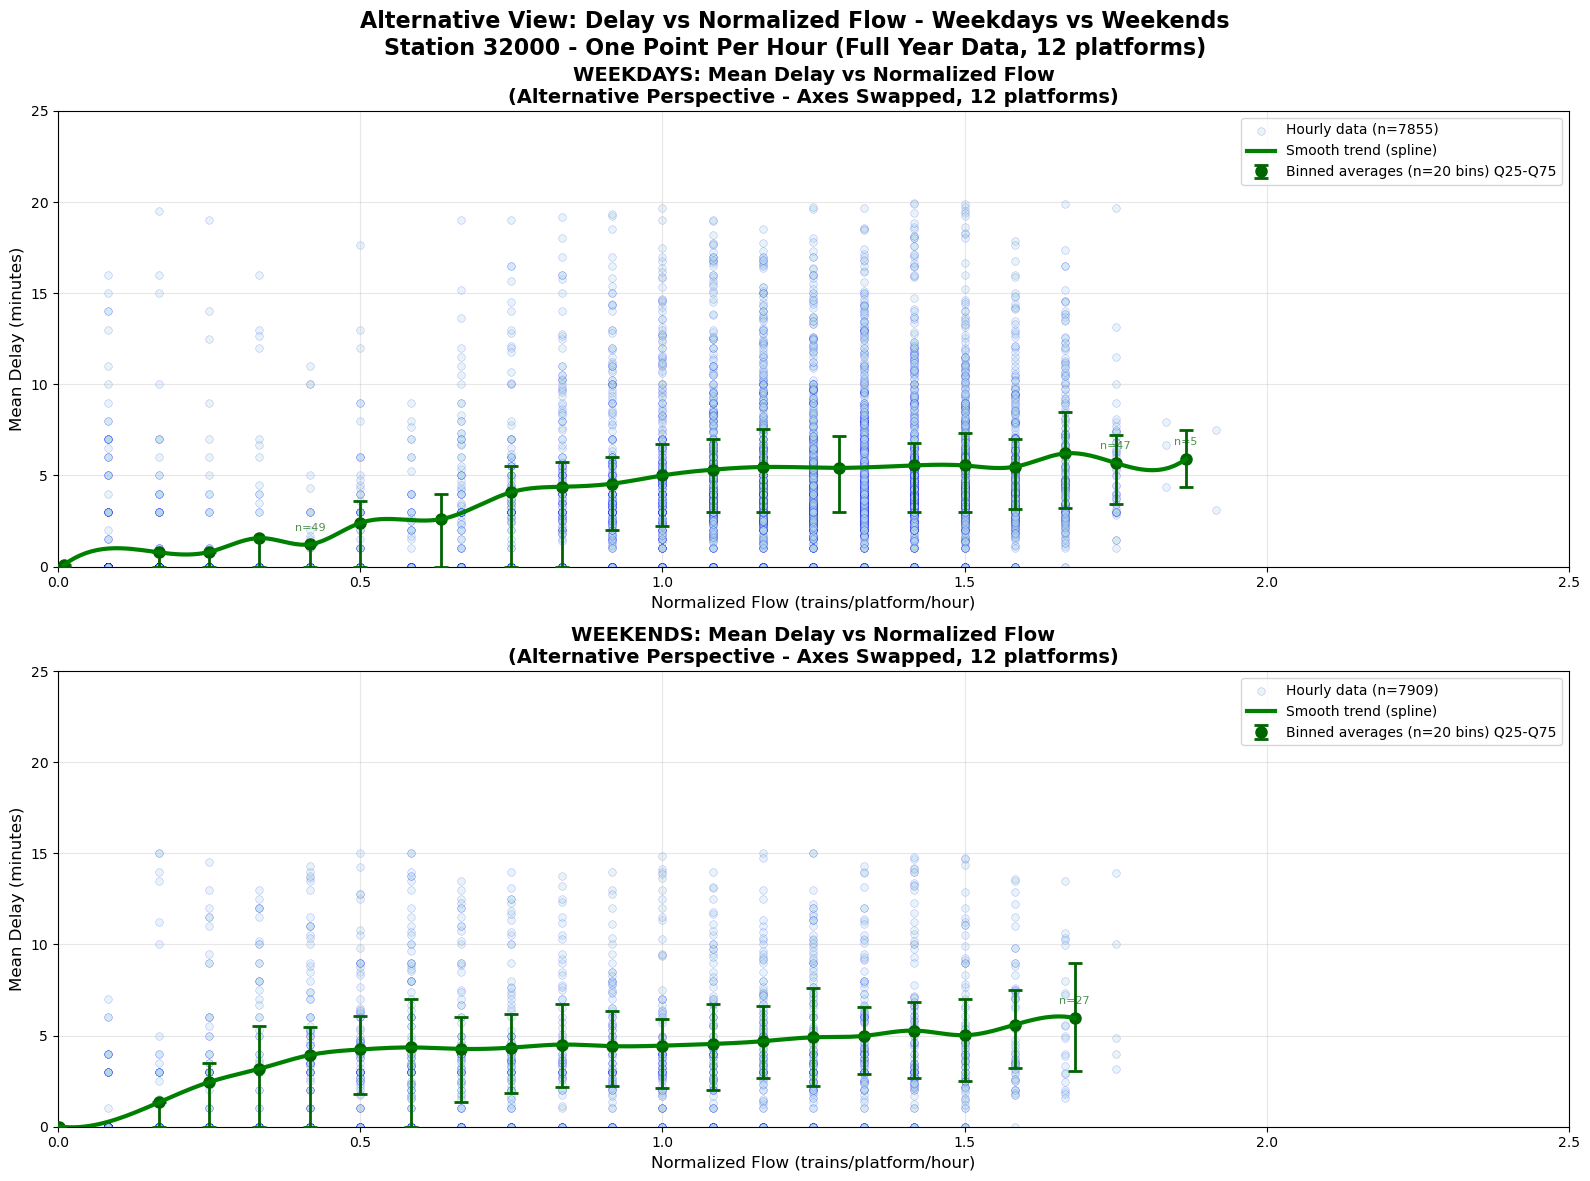

In [54]:
# Manchester Picadilly Station Tests

print("Testing variable relationships function...")
relationships_results = plot_variable_relationships_normalized(
    station_id='32000',
    all_data=all_data,
    time_window_minutes=60,
    num_platforms= 12,
    figsize=(16, 12),
    max_delay_percentile=98
)
plt.show()

Best Busy Stations

these 2 stations have little trains as they operates London underground mainly, and c2c trains additionally (for the first) and Network Rail lines (for the second)! They are also terminating stations

Testing variable relationships function...
🚀 CREATING NORMALIZED TEMPORAL FLOW ANALYSIS FOR STATION 51531
📊 Normalizing by 11 platforms
Loaded 28810 total records for station 51531
Using 28796 arrived trains (both incident and non-incident) for flow calculation
Creating datetime timestamps from EVENT_DATETIME...
Loaded 28810 total records for station 51531
Using 28796 arrived trains (both incident and non-incident) for flow calculation
Creating datetime timestamps from EVENT_DATETIME...
Found date mappings for 7 day codes
  MO: 54 unique dates from 2024-02-05 to 2024-12-30
  TU: 53 unique dates from 2024-02-06 to 2024-12-24
  WE: 52 unique dates from 2024-02-07 to 2025-01-01
  TH: 53 unique dates from 2024-02-08 to 2025-01-02
  FR: 52 unique dates from 2024-02-09 to 2025-01-04
  SA: 56 unique dates from 2024-02-10 to 2025-01-05
  SU: 47 unique dates from 2024-02-04 to 2024-12-29
Found date mappings for 7 day codes
  MO: 54 unique dates from 2024-02-05 to 2024-12-30
  TU: 53 unique date

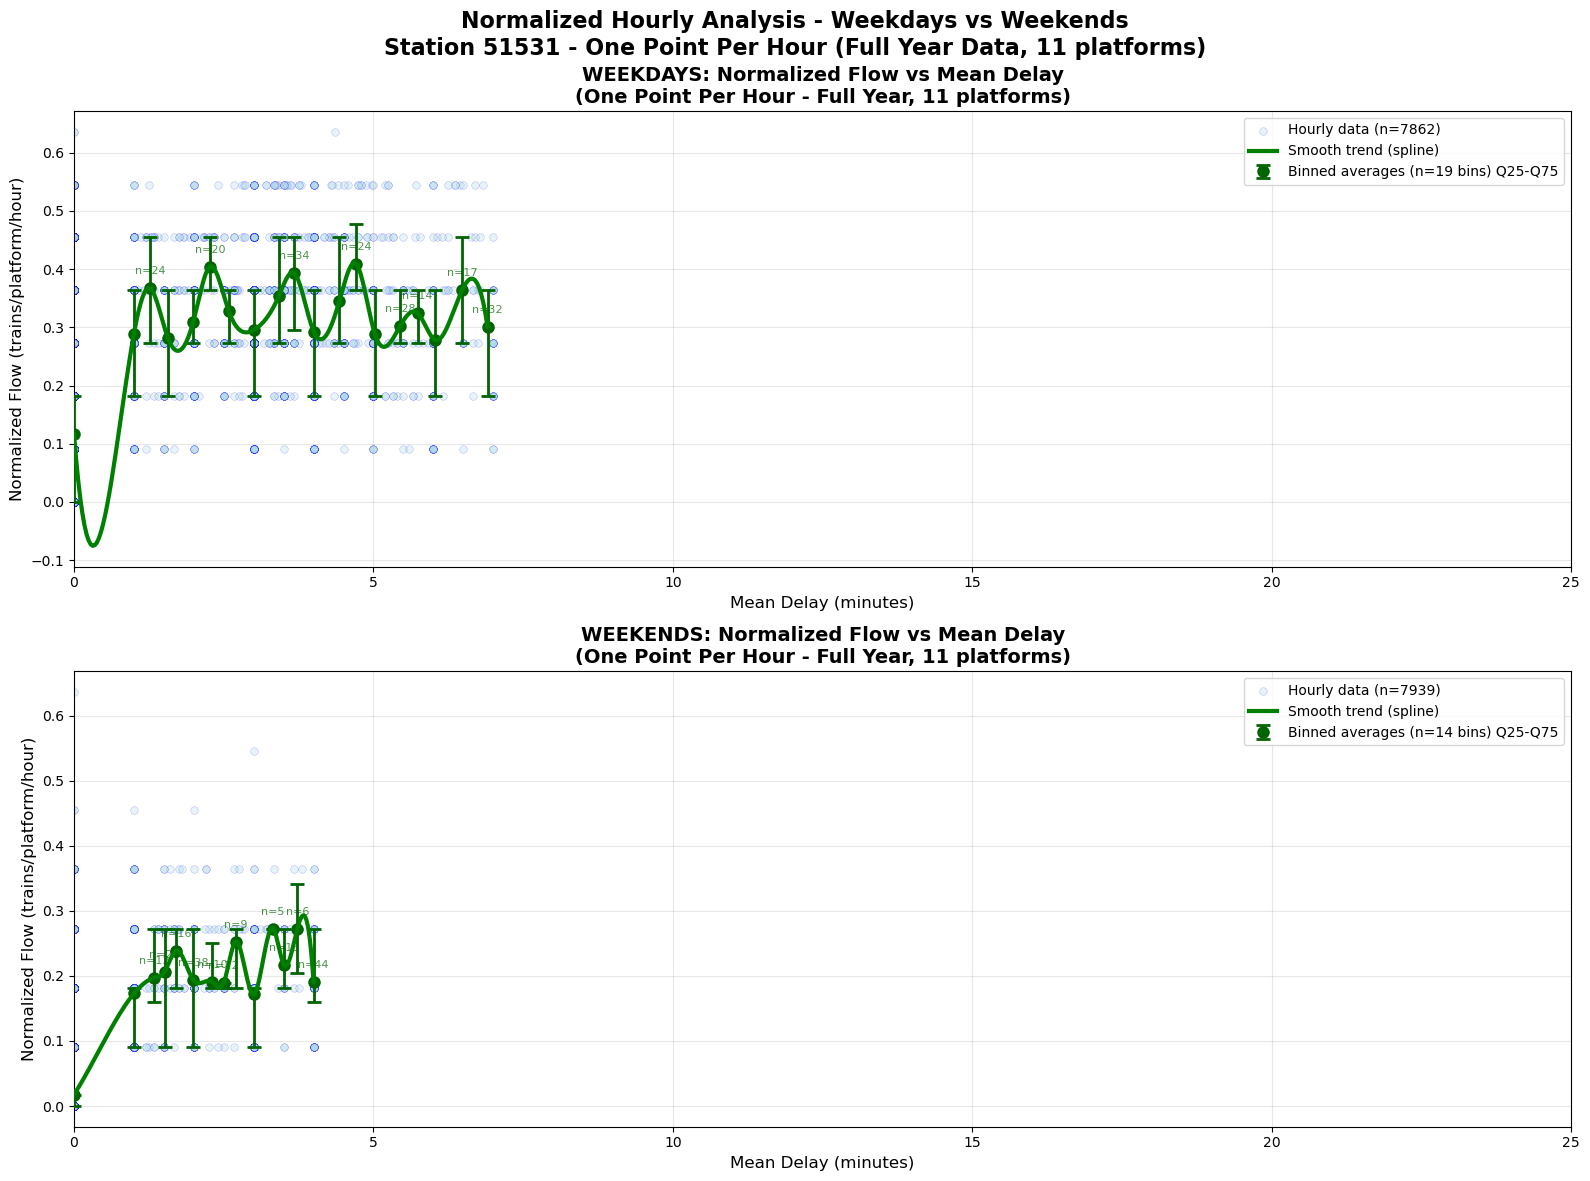

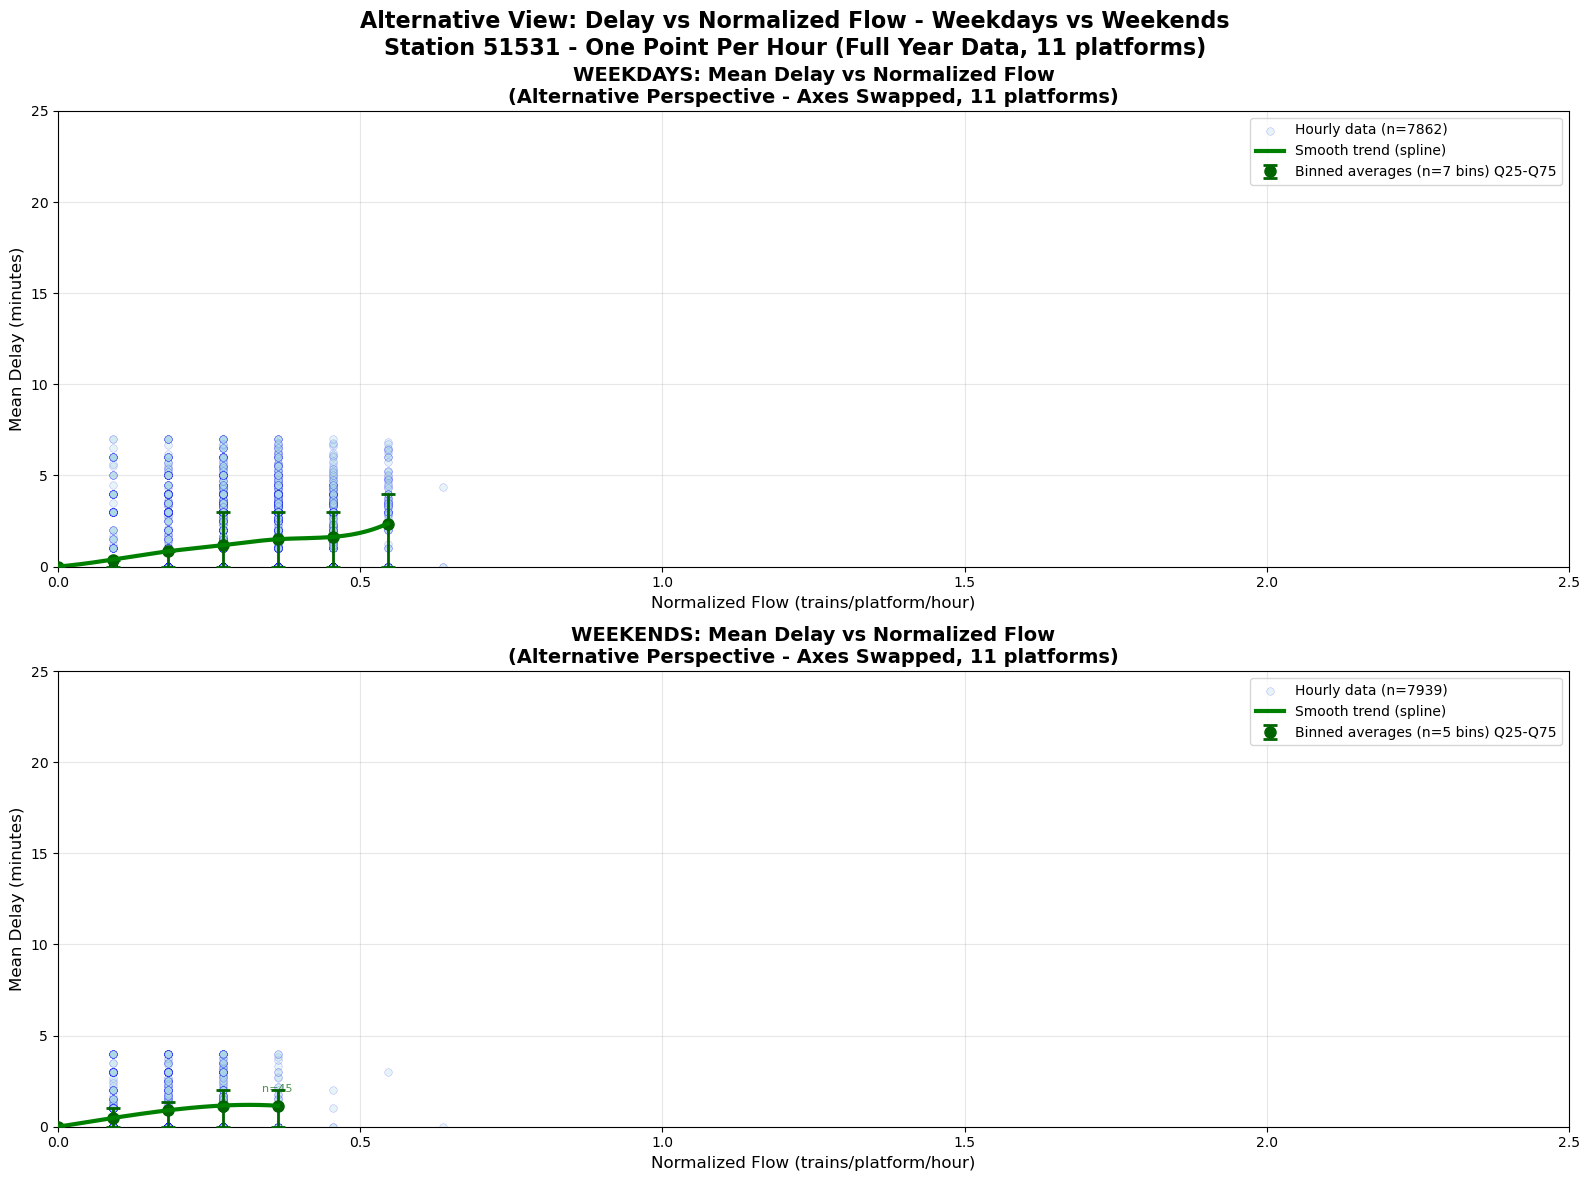

In [55]:
# Barking London Station Tests
# Test the variable relationships function
print("Testing variable relationships function...")
relationships_results = plot_variable_relationships_normalized(
    station_id='51531',
    all_data=all_data,
    time_window_minutes=60,
    num_platforms=11,
    figsize=(16, 12),
    max_delay_percentile=98
)
plt.show()

Testing variable relationships function...
🚀 CREATING NORMALIZED TEMPORAL FLOW ANALYSIS FOR STATION 88403
📊 Normalizing by 11 platforms
Loaded 20149 total records for station 88403
Using 19718 arrived trains (both incident and non-incident) for flow calculation
Creating datetime timestamps from EVENT_DATETIME...
Found date mappings for 7 day codes
  MO: 61 unique dates from 2024-02-05 to 2024-12-24
  TU: 67 unique dates from 2024-02-06 to 2024-12-31
  WE: 47 unique dates from 2024-02-07 to 2024-12-18
  TH: 46 unique dates from 2024-02-08 to 2024-12-19
  FR: 49 unique dates from 2024-02-09 to 2025-01-03
  SA: 37 unique dates from 2024-02-10 to 2025-01-04
  SU: 38 unique dates from 2024-02-04 to 2024-12-29
Found date mappings for 7 day codes
  MO: 61 unique dates from 2024-02-05 to 2024-12-24
  TU: 67 unique dates from 2024-02-06 to 2024-12-31
  WE: 47 unique dates from 2024-02-07 to 2024-12-18
  TH: 46 unique dates from 2024-02-08 to 2024-12-19
  FR: 49 unique dates from 2024-02-09 to 2

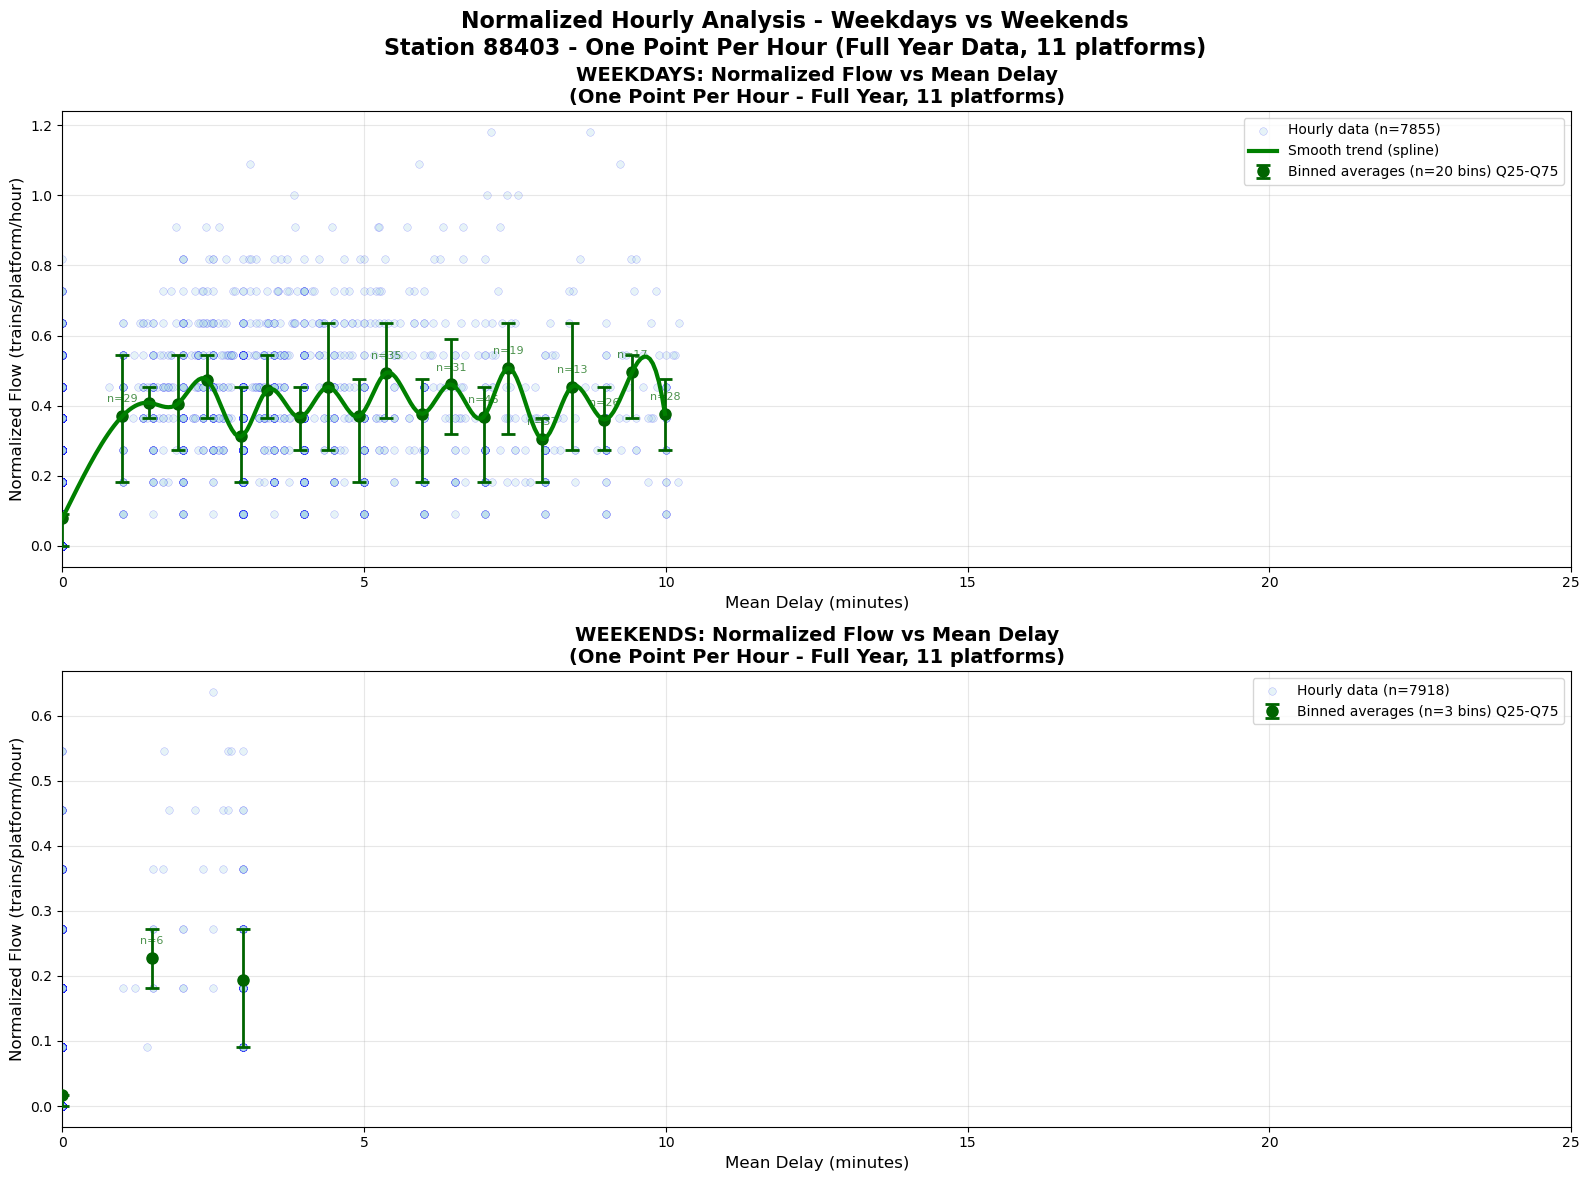

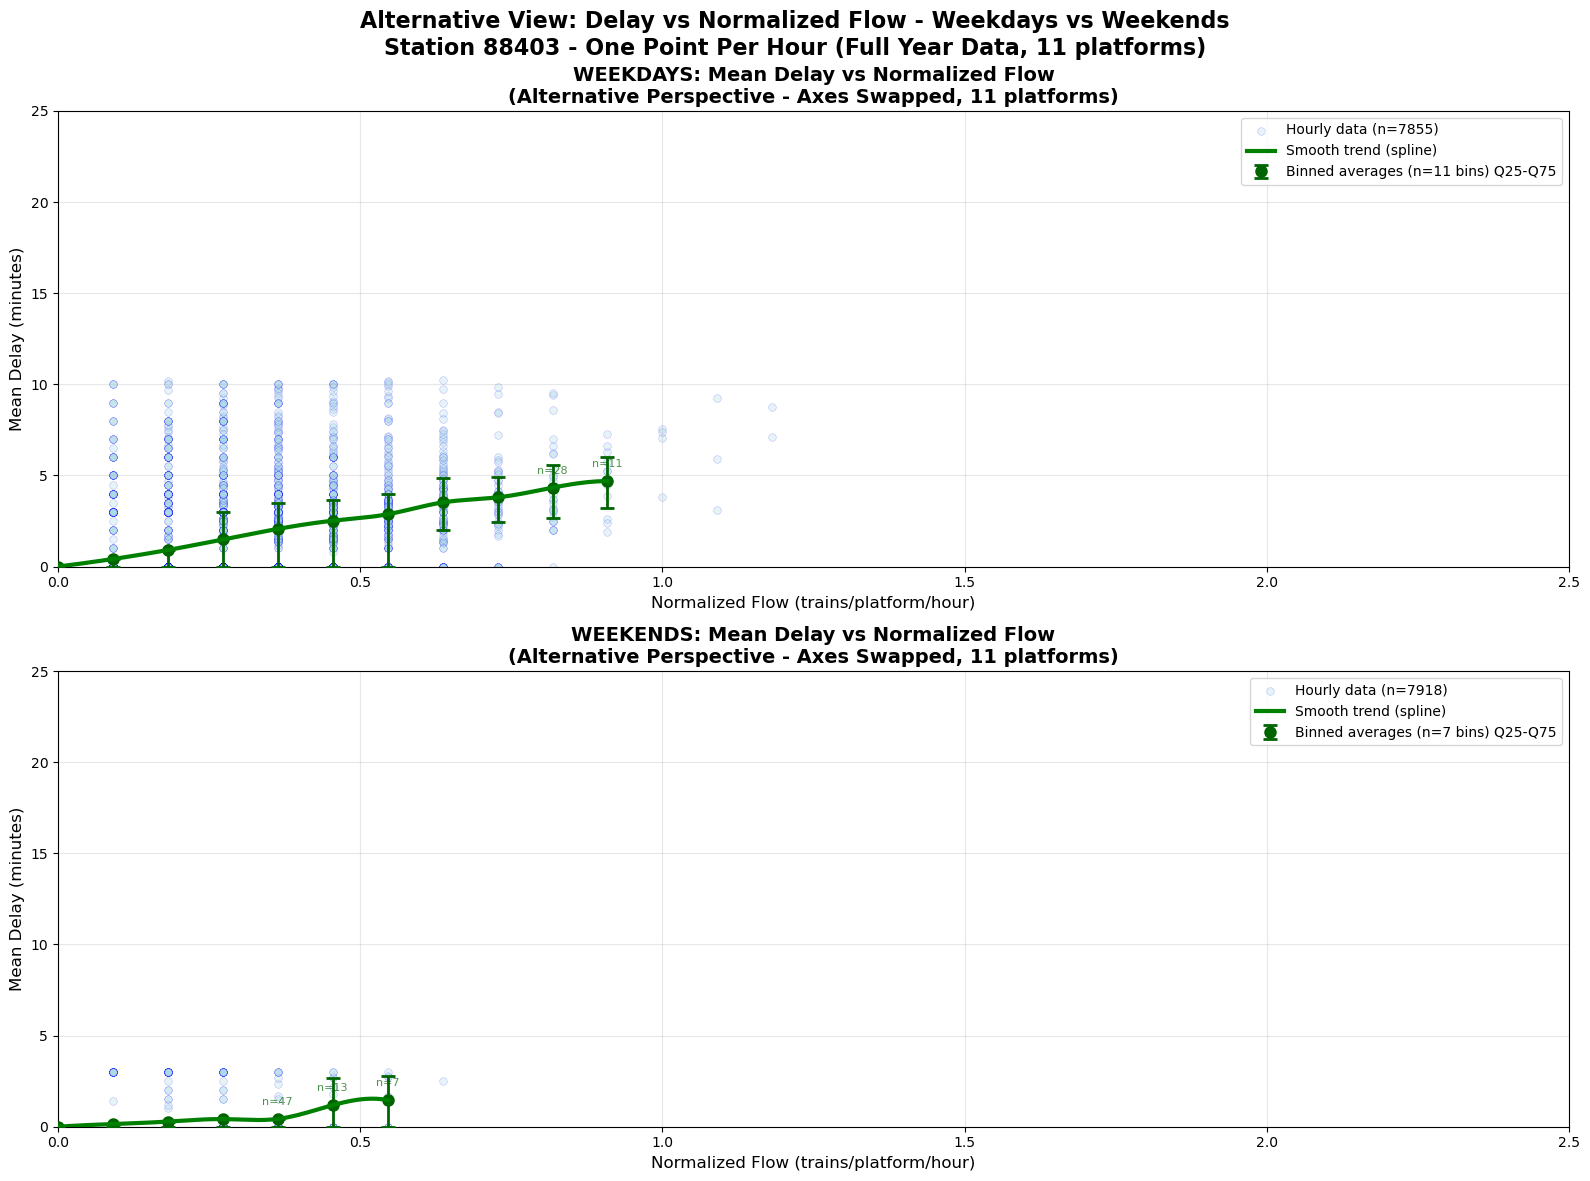

In [56]:
# Cannon Street London Station Tests
# Test the variable relationships function
print("Testing variable relationships function...")
relationships_results = plot_variable_relationships_normalized(
    station_id='88403',
    all_data=all_data,
    time_window_minutes=60,
    num_platforms=11,
    figsize=(16, 12),
    max_delay_percentile=98
)
plt.show()

Running trains in system vs delay analysis...
🚂 TRAINS IN SYSTEM vs DELAY ANALYSIS FOR STATION 32000
📊 Platforms: 14, Assumed Dwell Time: 5 min
📏 Trains in system NORMALIZED by 14 platforms
📏 ONE POINT PER HOUR (same as plot_variable_relationships)
⚠️  DELAY calculated ONLY from delayed trains (delay > 0)
Loaded 217738 total records for station 32000
Using 214264 arrived trains
Loaded 217738 total records for station 32000
Using 214264 arrived trains
Created 214264 valid timestamps
Created 214264 valid timestamps

✅ Processed 5430 weekday hours and 1981 weekend hours

📊 STATION 32000 - WEEKDAYS DELAY vs TRAINS IN SYSTEM

DATA SUMMARY:
  - Total hours analyzed: 5430
  - Normalized trains in system range: 0.071 - 1.643 trains/platform
  - Mean delay range: 0.00 - 29.25 minutes
  - Overall mean delay: 5.84 minutes
  - Hours with delays > 0: 4443 (81.8%)
  - Correlation (trains in system vs delay): 0.323

📊 STATION 32000 - WEEKENDS DELAY vs TRAINS IN SYSTEM

DATA SUMMARY:
  - Total hours a

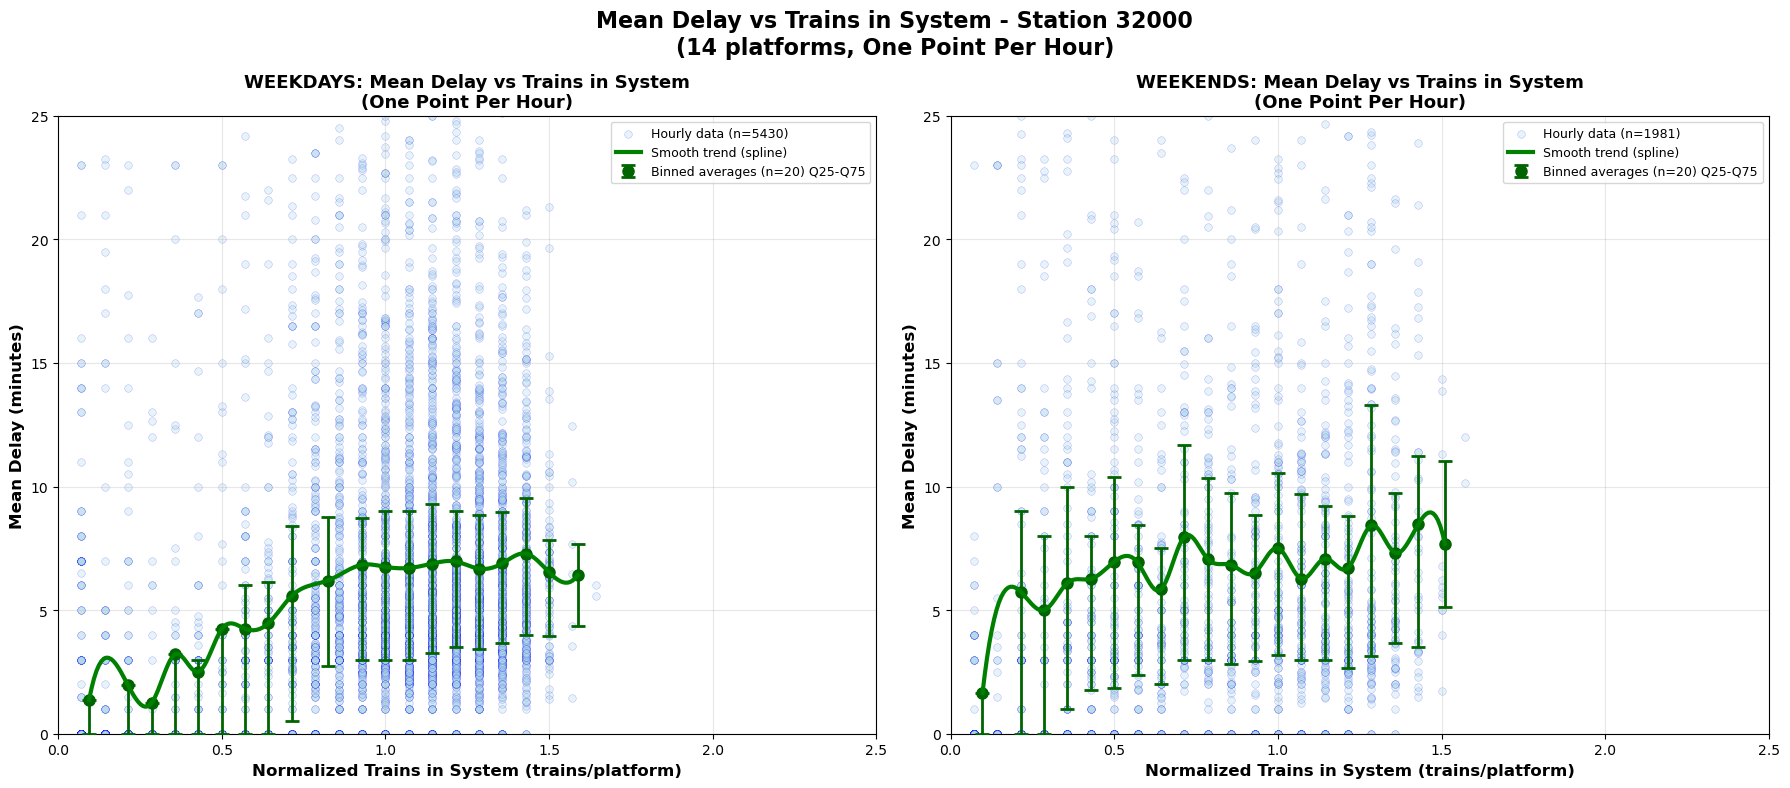

In [44]:
# Test trains in system vs delay analysis for Manchester Piccadilly
print("Running trains in system vs delay analysis...")
delay_results = plot_trains_in_system_vs_delay(
    station_id='32000',
    all_data=all_data,
    time_window_minutes=60,
    num_platforms=14,
    figsize=(18, 8),
    max_delay_percentile=98,
    dwell_time_minutes=5
)
plt.show()

Running trains in system vs delay analysis...
🚂 TRAINS IN SYSTEM vs DELAY ANALYSIS FOR STATION 33087
📊 Platforms: 5, Assumed Dwell Time: 5 min
📏 Trains in system NORMALIZED by 5 platforms
📏 ONE POINT PER HOUR (same as plot_variable_relationships)
⚠️  DELAY calculated ONLY from delayed trains (delay > 0)
Loaded 58498 total records for station 33087
Using 57734 arrived trains
Loaded 58498 total records for station 33087
Using 57734 arrived trains
Created 57734 valid timestamps
Created 57734 valid timestamps

✅ Processed 4736 weekday hours and 1718 weekend hours

📊 STATION 33087 - WEEKDAYS DELAY vs TRAINS IN SYSTEM

DATA SUMMARY:
  - Total hours analyzed: 4736
  - Normalized trains in system range: 0.200 - 2.400 trains/platform
  - Mean delay range: 0.00 - 30.00 minutes
  - Overall mean delay: 5.91 minutes
  - Hours with delays > 0: 2997 (63.3%)
  - Correlation (trains in system vs delay): 0.197

📊 STATION 33087 - WEEKENDS DELAY vs TRAINS IN SYSTEM

DATA SUMMARY:
  - Total hours analyzed:

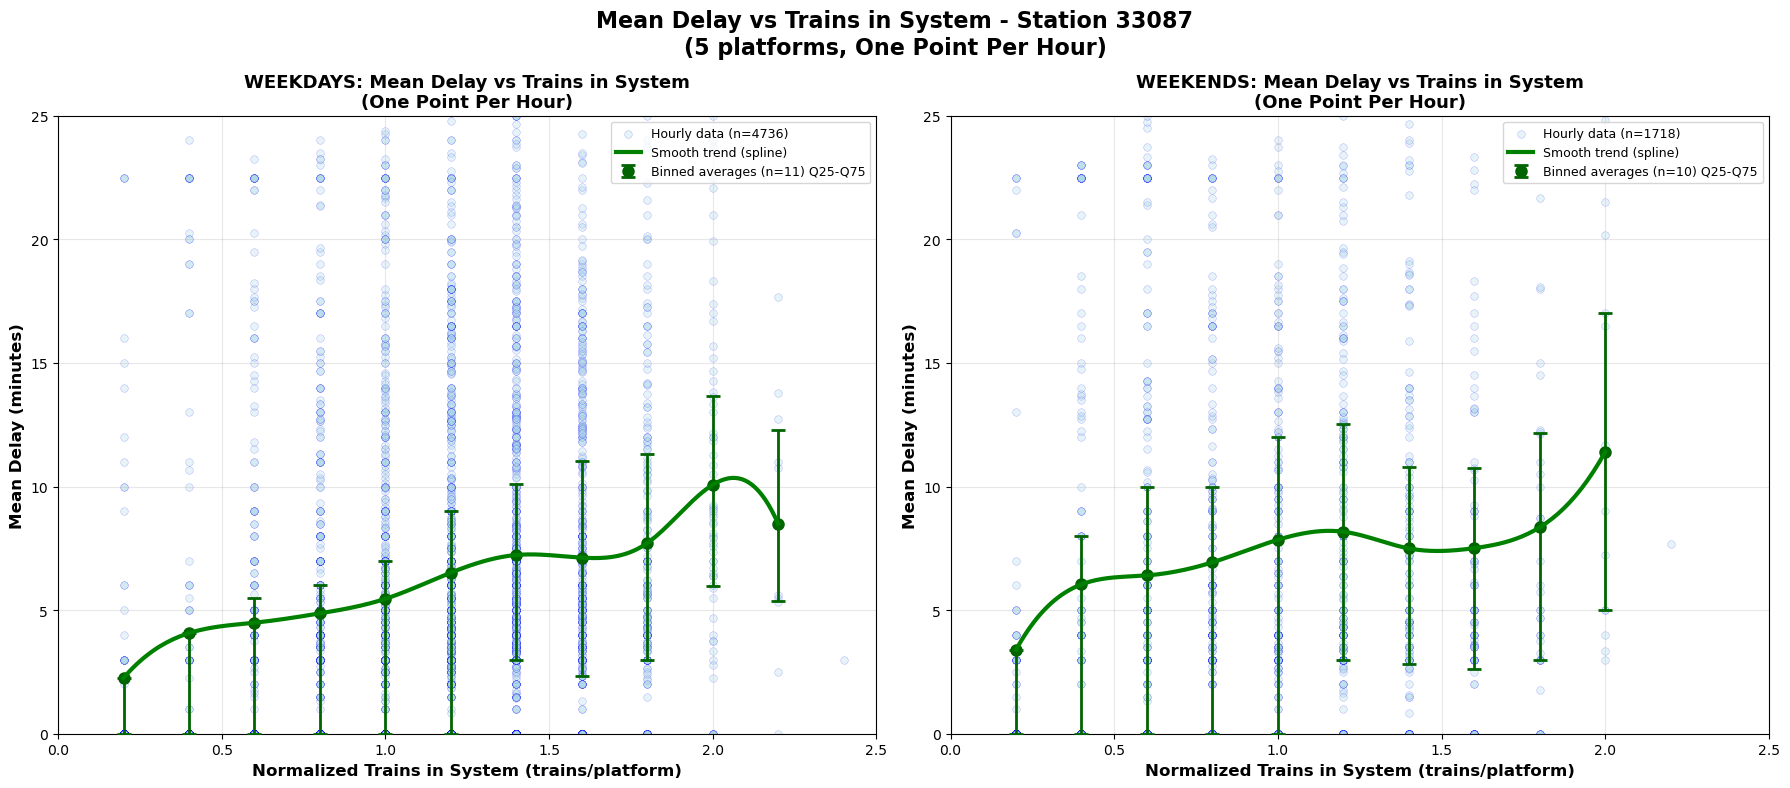

In [45]:
# Test trains in system vs delay analysis for Manchester Piccadilly
print("Running trains in system vs delay analysis...")
delay_results = plot_trains_in_system_vs_delay(
    station_id='33087',
    all_data=all_data,
    time_window_minutes=60,
    num_platforms=5,
    figsize=(18, 8),
    max_delay_percentile=98,
    dwell_time_minutes=5
)
plt.show()

Running trains in system vs delay analysis...
🚂 TRAINS IN SYSTEM vs DELAY ANALYSIS FOR STATION 51531
📊 Platforms: 8, Assumed Dwell Time: 5 min
📏 Trains in system NORMALIZED by 8 platforms
📏 ONE POINT PER HOUR (same as plot_variable_relationships)
⚠️  DELAY calculated ONLY from delayed trains (delay > 0)
Loaded 28810 total records for station 51531
Using 28796 arrived trains
Created 28796 valid timestamps
Created 28796 valid timestamps

✅ Processed 4721 weekday hours and 1538 weekend hours

📊 STATION 51531 - WEEKDAYS DELAY vs TRAINS IN SYSTEM

DATA SUMMARY:
  - Total hours analyzed: 4721
  - Normalized trains in system range: 0.125 - 0.875 trains/platform
  - Mean delay range: 0.00 - 9.00 minutes
  - Overall mean delay: 1.33 minutes
  - Hours with delays > 0: 1716 (36.3%)
  - Correlation (trains in system vs delay): 0.248

📊 STATION 51531 - WEEKENDS DELAY vs TRAINS IN SYSTEM

DATA SUMMARY:
  - Total hours analyzed: 1538
  - Normalized trains in system range: 0.125 - 0.875 trains/platfor

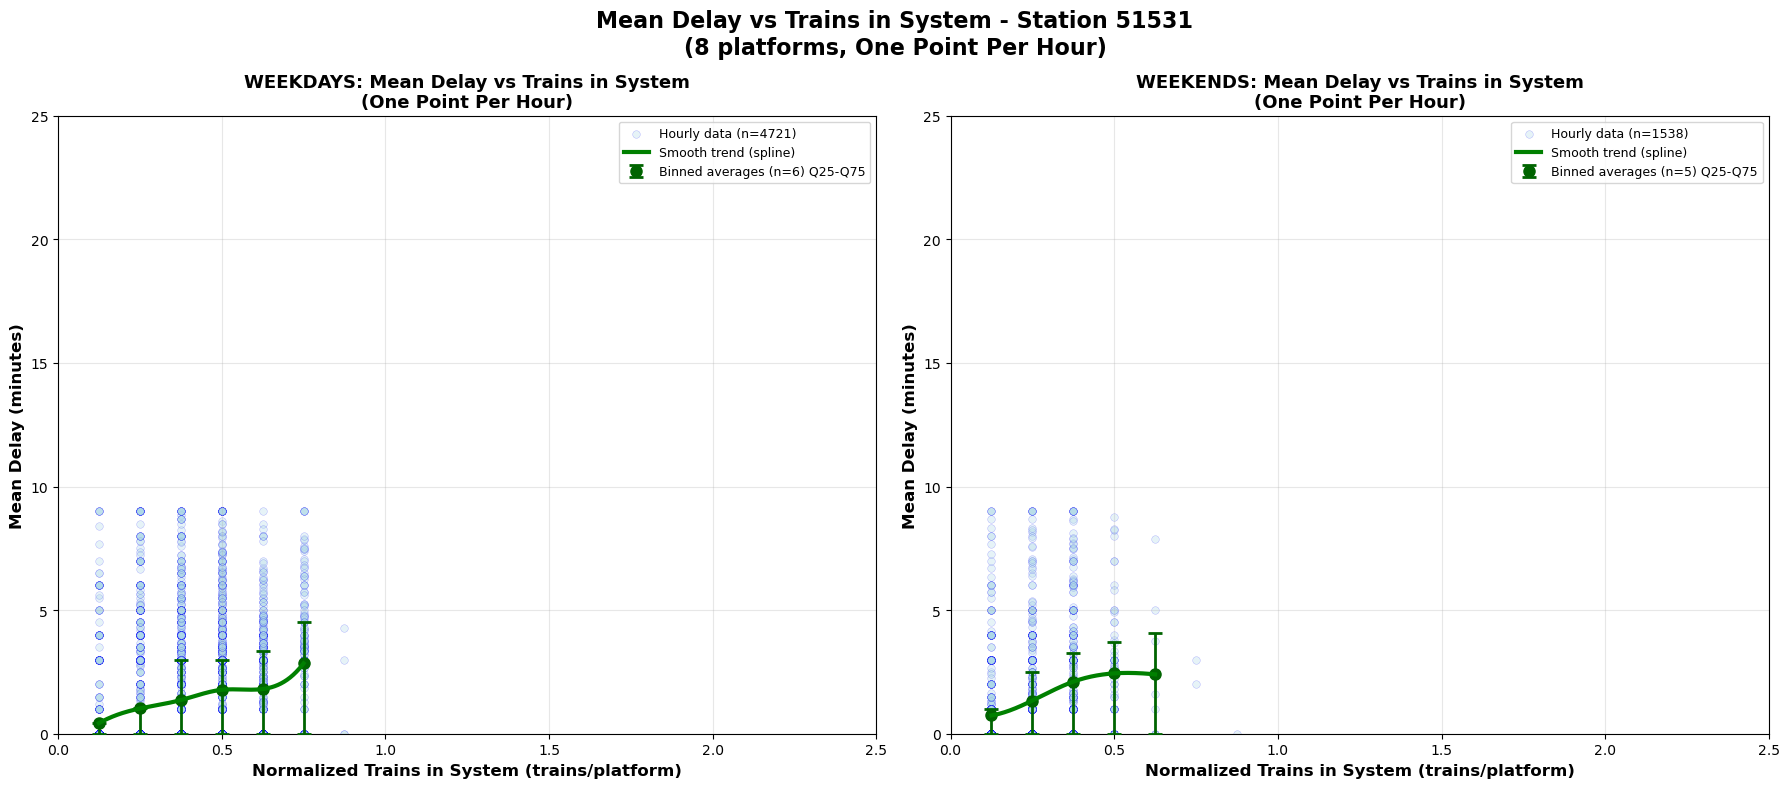

In [46]:

print("Running trains in system vs delay analysis...")
delay_results = plot_trains_in_system_vs_delay(
    station_id='51531',
    all_data=all_data,
    time_window_minutes=60,
    num_platforms=8,
    figsize=(18, 8),
    max_delay_percentile=98,
    dwell_time_minutes=5
)
plt.show()